# Backtesting ML Classification-Based

![](src/res_classification.png)

## Load the model

In [5]:
import pickle

In [6]:
with open('models/model_dt_classification.pkl', 'rb') as f:
    model_dt = pickle.load(f)

In [7]:
model_dt

DecisionTreeClassifier(max_depth=15)

## Load the data

In [8]:
import pandas as pd

df = pd.read_excel('data/msft_linkedin_processed.xlsx', index_col=0, parse_dates=['Date'])
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800,1.549141,Up
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400,0.321694,Up
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100,1.286125,Up
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900,-0.478620,Down
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700,-0.159793,Down
...,...,...,...,...,...,...,...
2023-05-19,316.739990,318.750000,316.369995,318.339996,27529500,0.884238,Up
2023-05-22,318.600006,322.589996,318.010010,321.179993,24115700,-1.877810,Down
2023-05-23,320.029999,322.720001,315.250000,315.260010,30797200,-0.449260,Down


## Backtesting.py Library

### Create your Strategy Class

In [9]:
from backtesting import Backtest, Strategy

#### Simulate the prediction for the last observation

In [10]:
df_explanatory = df.drop(columns=['change_tomorrow'	,'change_tomorrow_direction'])

In [11]:
explanatory_today = df_explanatory.iloc[[-1],:]

In [12]:
forecast_tomorrow = model_dt.predict(explanatory_today)[0]

#### Write the prediction process in the Strategy class

In [13]:
class ClassificationUP(Strategy):
  def init(self):
    self.model = model_dt

  def next(self):
    explanatory_today = df_explanatory.iloc[[-1],:]
    forecast_tomorrow = model_dt.predict(explanatory_today)[0]

  # condition for buy or sell
    

  

#### Calculate Purchase Recommendation

##### Buy if it goes up

In [14]:
list_buy_sell = []

In [15]:
for tomorrow in df.change_tomorrow_direction:
  if tomorrow == 'Up':
    list_buy_sell.append(1)
  elif tomorrow == 'Down':
    list_buy_sell.append(-1)

In [16]:
df['buy_sell'] = list_buy_sell

In [17]:
df[['change_tomorrow_direction', 'buy_sell']].head(10)

,change_tomorrow_direction,buy_sell
Date,,
2016-12-08,Up,1
2016-12-09,Up,1
2016-12-12,Up,1
2016-12-13,Down,-1
2016-12-14,Down,-1
2016-12-15,Down,-1
2016-12-16,Up,1
2016-12-19,Down,-1
2016-12-20,Down,-1


##### Buy if it goes and sell if down

> You can only sell if you have already bought

In [18]:
list_buy_sell = []
already_bought = False

In [19]:
for tomorrow in df.change_tomorrow_direction:
  if tomorrow == 'Up' and already_bought == False:
    list_buy_sell.append(1)
    already_bought = True
  elif tomorrow == 'Down' and already_bought == True:
    list_buy_sell.append(-1)
    already_bought = False
  else:
    list_buy_sell.append(0)

In [20]:
df['buy_sell'] = list_buy_sell

In [21]:
df[['change_tomorrow_direction', 'buy_sell']].head(10)

,change_tomorrow_direction,buy_sell
Date,,
2016-12-08,Up,1
2016-12-09,Up,0
2016-12-12,Up,0
2016-12-13,Down,-1
2016-12-14,Down,0
2016-12-15,Down,0
2016-12-16,Up,1
2016-12-19,Down,-1
2016-12-20,Down,0


#### Add conditions to the strategy

In [27]:
class ClassificationUP(Strategy):
  def init(self):
    self.model = model_dt
    self.already_bought = False

  def next(self):
    explanatory_today = self.data.df.iloc[[-1],:]
    forecast_tomorrow = model_dt.predict(explanatory_today)[0]

    # condition for buy or sell
    if forecast_tomorrow == 'Up' and self.already_bought == False:
      self.buy()
      self.already_bought = True
    elif forecast_tomorrow == 'Down' and self.already_bought == True:
      self.sell()
      self.already_bought = False
    else:
      pass
    

In [28]:
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction,buy_sell
Date,,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800,1.549141,Up,1
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400,0.321694,Up,0
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100,1.286125,Up,0
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900,-0.478620,Down,-1
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700,-0.159793,Down,0
...,...,...,...,...,...,...,...,...
2023-05-19,316.739990,318.750000,316.369995,318.339996,27529500,0.884238,Up,1
2023-05-22,318.600006,322.589996,318.010010,321.179993,24115700,-1.877810,Down,-1
2023-05-23,320.029999,322.720001,315.250000,315.260010,30797200,-0.449260,Down,0


In [29]:
df_explanatory


,Open,High,Low,Close,Volume
Date,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700
...,...,...,...,...,...
2023-05-19,316.739990,318.750000,316.369995,318.339996,27529500
2023-05-22,318.600006,322.589996,318.010010,321.179993,24115700
2023-05-23,320.029999,322.720001,315.250000,315.260010,30797200


### Define initial conditions

In [30]:
bt = Backtest(data=df_explanatory, strategy=ClassificationUP,
              cash=10000, commission=.002, exclusive_orders=True)

### Run backtesting

In [31]:
results = bt.run()

### Interpret backtesting results

In [32]:
results.to_frame(name='Values').loc[:'Return [%]']

,Values
Start,2016-12-08 00:00:00
End,2023-05-25 00:00:00
Duration,2359 days 00:00:00
Exposure Time [%],99.876999
Equity Final [$],32196358.655578
Equity Peak [$],33550179.822429
Return [%],321863.586556


In [ ]:
bt.plot(filename='reports_backtesting/msft_classification.html')

<Axes: xlabel='Date'>

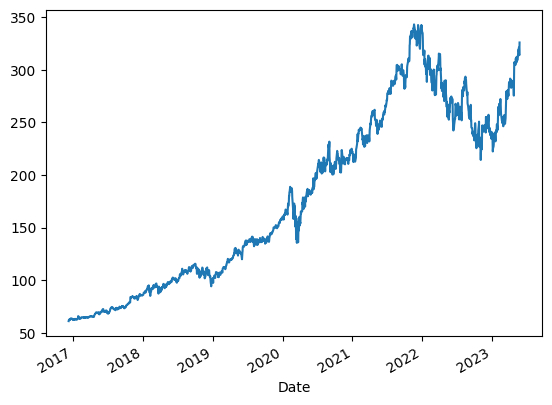

In [33]:
df.Close.plot()

## Practice to master the knowledge

Work on the challenge with another dataset:

1. Learn the <a>mental models</a> to solve the challenge faster.
2. Complete the <a href="03C_Backtesting ML Classification-Based.ipynb">notebook</a>.